<a href="https://colab.research.google.com/github/Rushabhtikale92/Credit-Card-Default-Prediction/blob/main/Copy_of_Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [ ]:
# Importing Library for the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import f1_score 
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Reading Data of credit card default customer
data = pd.read_csv('/content/drive/MyDrive/CSV/default of credit card clients.xls - Data.csv')

In [ ]:
# settings to display all columns
pd.set_option("display.max_columns", None)
# display the dataframe head
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
column_dict = {'default payment next month':'DEFAULT'}
data.rename(columns= column_dict, inplace=True)

In [ ]:
columns = data.columns
columns 

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')

# Checking For NaN Values

In [ ]:
data.isna().sum().sum()

0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

# **Features Extraction**

The feature extraction is one of the process in which we can extract the features from the dataset and trying to get deep into data and understand what type of data we have to deal with it, so lets start the features extraction.

In [ ]:
data['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

1 - MALE

2 - FEMALE

In [ ]:
data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

1 = graduate school 
<BR> 2 = university
<BR> 3 = high school
<BR> 4 = others


In [ ]:
data['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

1 = married
<bR> 2 = single
<BR> 3 = others

In [ ]:
heighest_age = data['AGE'].value_counts().sort_values(ascending=False)
heighest_age.head()

29    1605
27    1477
28    1409
30    1395
26    1256
Name: AGE, dtype: int64

In [ ]:
# Checking the shape of the dataset
data.shape

(30000, 25)

In [ ]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


# **Removing Outlier**

Outlier is the present of unrelatable data from the dataset. So we must to deal with as it throws away from our intention, so we have to rid from this and give the best score for the model.
when we looking above information we are getting to know that some of the feature has a outlier so we just try to remove it .

In [ ]:
cols = ['LIMIT_BAL','BILL_AMT1','BILL_AMT2', 'BILL_AMT4', 'BILL_AMT5',	'BILL_AMT6',	'PAY_AMT1','PAY_AMT3',	'PAY_AMT4',	'PAY_AMT5',	'PAY_AMT6'	]
Q1 = data[cols].quantile(0.25)
Q3 = data[cols].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
data = data[~((data[cols]<lower_limit)|(data[cols]>upper_limit)).any(axis=1)]
data.shape

(20367, 25)

Now our data is looking good for prediction as we remove all outlier from the data.

Now lets try to read data through visualization as its always make the good decision by just simply overthorough it.

# **Exploring Dependent Variable**

The dependent variable is the non dependable features from all of the dataset. Our dataset contain default features as independent variable. In which there are two types one is default and non default in binary form 1-Default, 2-Non Default

In [ ]:
data['DEFAULT'].value_counts()

0    15192
1     5175
Name: DEFAULT, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


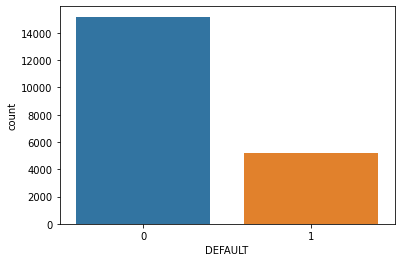

In [ ]:
sns.countplot(data['DEFAULT'])

By wondering above dataset we get to know that we are mostly have non default dataset and some are default so we have to deal with this data and try to not show a default customer as non default.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


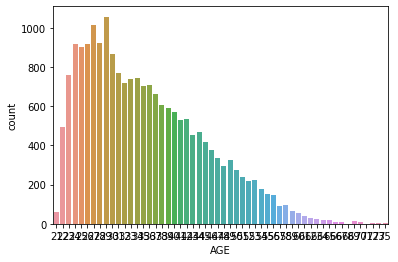

In [ ]:
sns.countplot(data['AGE'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


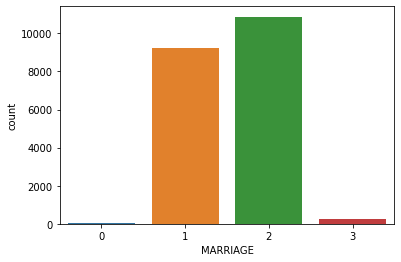

In [ ]:
sns.countplot(data['MARRIAGE'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


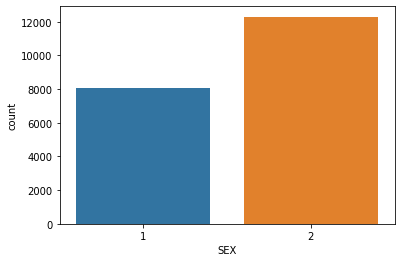

In [ ]:
sns.countplot(data['SEX'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


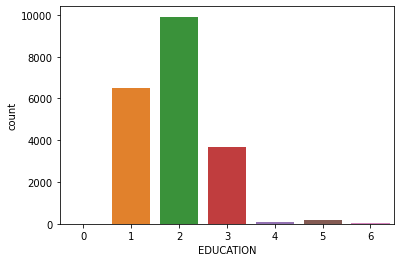

In [ ]:
sns.countplot(data['EDUCATION'])

# **Relation with Dependent variable**

By observing this relationship we can easily predict the total customers and behaviour of properly paying their installment. So we are gaining insights by using relationship between dependent and independent variable.

#SEX VS DEFAULT

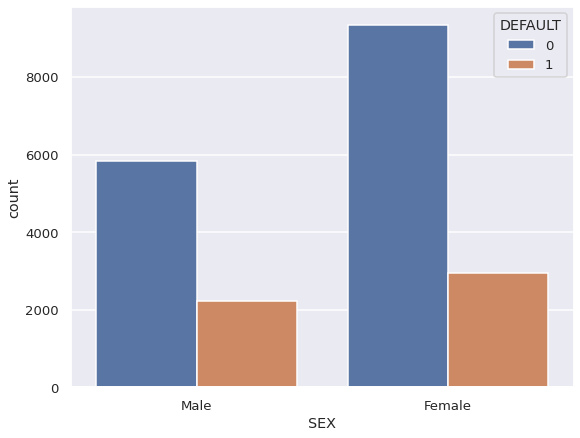

In [ ]:
sns.set(rc={'figure.figsize':(9,7)})
sns.set_context("talk", font_scale=0.8)

gender = sns.countplot(x='SEX', hue='DEFAULT', data=data)
gender.set_xticklabels(['Male','Female'])
plt.show()

This plot showing the deault and non default number of the male and female customer. By observing above plot there is 8000-9000 male are non default and around 4000 are default, and on another side most of the customers are female and non default and default are slightly greater than male.

# AGE VS DEFAULT

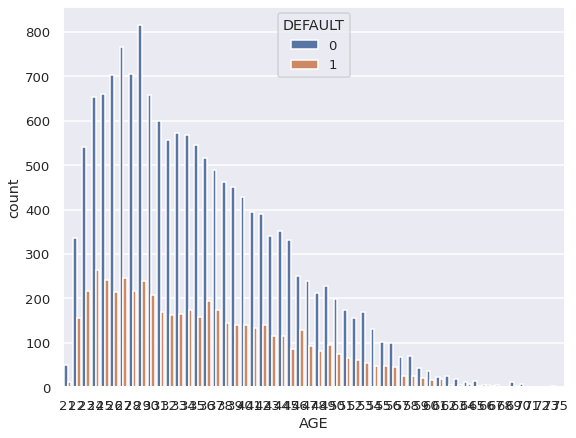

In [ ]:
sns.set(rc={'figure.figsize':(9,7)})
sns.set_context("talk", font_scale=0.8)

gender = sns.countplot(x='AGE', hue='DEFAULT', data=data)
plt.show()

# EDUCATION VS DEFAULT

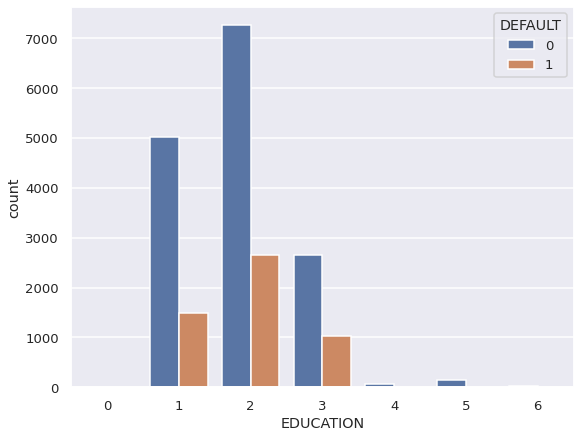

In [ ]:
sns.set(rc={'figure.figsize':(9,7)})
sns.set_context("talk", font_scale=0.8)
gender = sns.countplot(x='EDUCATION', hue='DEFAULT', data=data)
plt.show()

This chart give us a how many educators are default and not default for the credit card. so 1 = graduate school are almost 75% are non default and 25% are default.
2 = university are almost all are no defaulters and around 4000 are defaulters.
3 = high school are around 4000 is not default and nearly 1000 are defaulter. 4 = others

# MARRIAGE VS DEFAULT

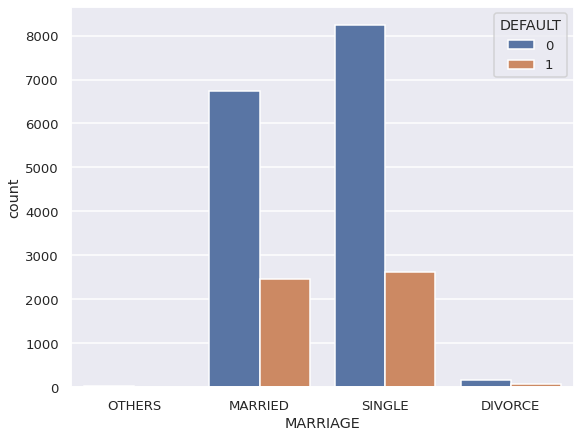

In [ ]:
sns.set(rc={'figure.figsize':(9,7)})
sns.set_context("talk", font_scale=0.8)
gender = sns.countplot(x='MARRIAGE', hue='DEFAULT', data=data)
gender.set_xticklabels(['OTHERS','MARRIED','SINGLE','DIVORCE'])
plt.show()

Here we get to know that married and single are almost same defaulters and for divorce are not much data so we dont explain for this much more.

# Exploring Default Payment 

# **For September**

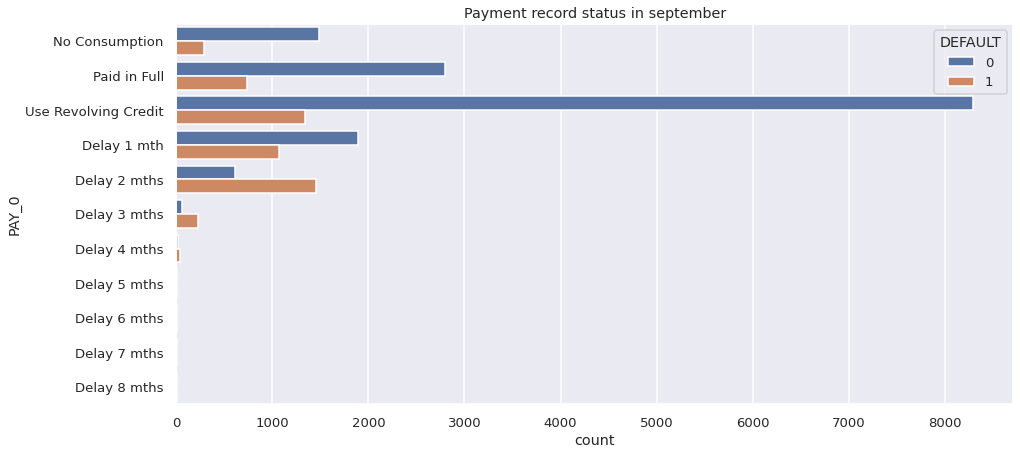

In [ ]:
sns.set(rc={'figure.figsize':(15,7)})
sns.set_context("talk", font_scale=0.8)
pay1 = sns.countplot(y="PAY_0", hue='DEFAULT', data=data)
pay1.set_yticklabels(['No Consumption','Paid in Full','Use Revolving Credit','Delay 1 mth','Delay 2 mths'
                     ,'Delay 3 mths','Delay 4 mths','Delay 5 mths','Delay 6 mths','Delay 7 mths','Delay 8 mths'])
pay1.set_title('Payment record status in september')
plt.show()

# **For August**

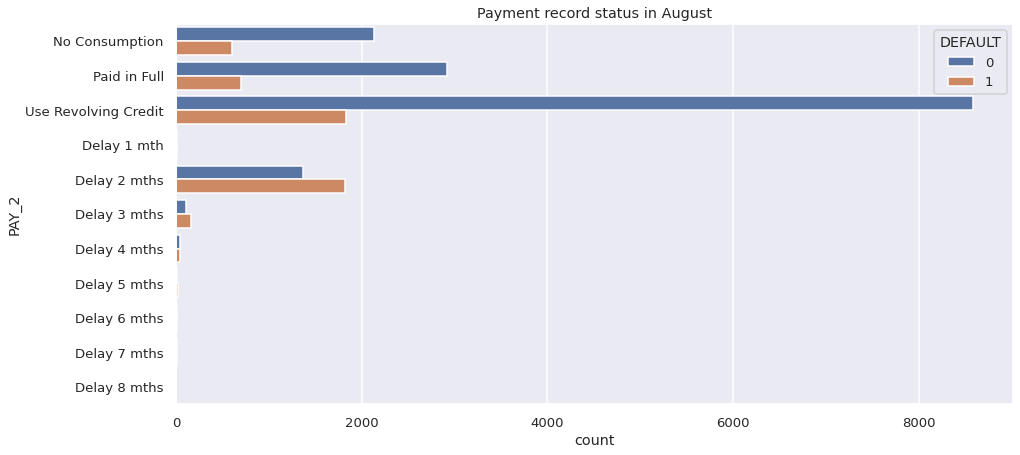

In [ ]:
sns.set(rc={'figure.figsize':(15,7)})
sns.set_context("talk", font_scale=0.8)
pay1 = sns.countplot(y="PAY_2", hue='DEFAULT', data=data)
pay1.set_yticklabels(['No Consumption','Paid in Full','Use Revolving Credit','Delay 1 mth','Delay 2 mths'
                     ,'Delay 3 mths','Delay 4 mths','Delay 5 mths','Delay 6 mths','Delay 7 mths','Delay 8 mths'])
pay1.set_title('Payment record status in August')
plt.show()

# **For July**

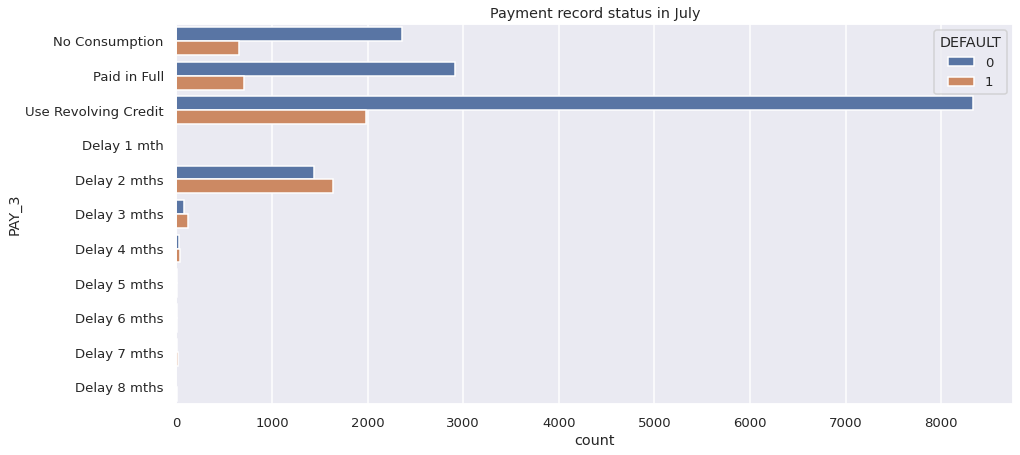

In [ ]:
sns.set(rc={'figure.figsize':(15,7)})
sns.set_context("talk", font_scale=0.8)
pay1 = sns.countplot(y="PAY_3", hue='DEFAULT', data=data)
pay1.set_yticklabels(['No Consumption','Paid in Full','Use Revolving Credit','Delay 1 mth','Delay 2 mths'
                     ,'Delay 3 mths','Delay 4 mths','Delay 5 mths','Delay 6 mths','Delay 7 mths','Delay 8 mths'])
pay1.set_title('Payment record status in July')
plt.show()

The total above chart is determining the behaviour of customer. How much customer delay to pay their payment, which customer used revolving card and their outcomes for default payment. The total history of their payments is from April to September.



# **Default Per Pay**

In [ ]:
default0 = data.groupby(data['PAY_2'][data['DEFAULT'] == 0]).size().reset_index(name='NOT_DEFAULT')
default1 = data.groupby(data['PAY_2'][data['DEFAULT'] == 1]).size().reset_index(name='DEFAULT')
total = data.groupby('PAY_2').size().reset_index(name='TOTAL')

pay1Table = default0.join(default1['DEFAULT']).join(total['TOTAL'])
pay1Table['PAY_2'] = ['No Consumption','Paid in Full','Use Revolving Credit','Delay 1 mth','Delay 2 mths'
                     ,'Delay 3 mths','Delay 4 mths','Delay 5 mths','Delay 6 mths','Delay 7 mths','Delay 8 mths']

pay1Table.replace(np.nan, 0)

,PAY_2,NOT_DEFAULT,DEFAULT,TOTAL
0,No Consumption,2135,602.0,2737
1,Paid in Full,2922,698.0,3620
2,Use Revolving Credit,8591,1827.0,10418
3,Delay 1 mth,12,4.0,16
4,Delay 2 mths,1363,1818.0,3181
5,Delay 3 mths,105,161.0,266
6,Delay 4 mths,44,41.0,85
7,Delay 5 mths,8,13.0,21
8,Delay 6 mths,3,4.0,7
9,Delay 7 mths,8,7.0,15


Here we count the total number of default and non default for the behavior of customer. Looking over above data the customer used revolving credit have more number of default, then delay for two month has a high number of default. The maximum customer is not default from the category of customer who used revolving credit.

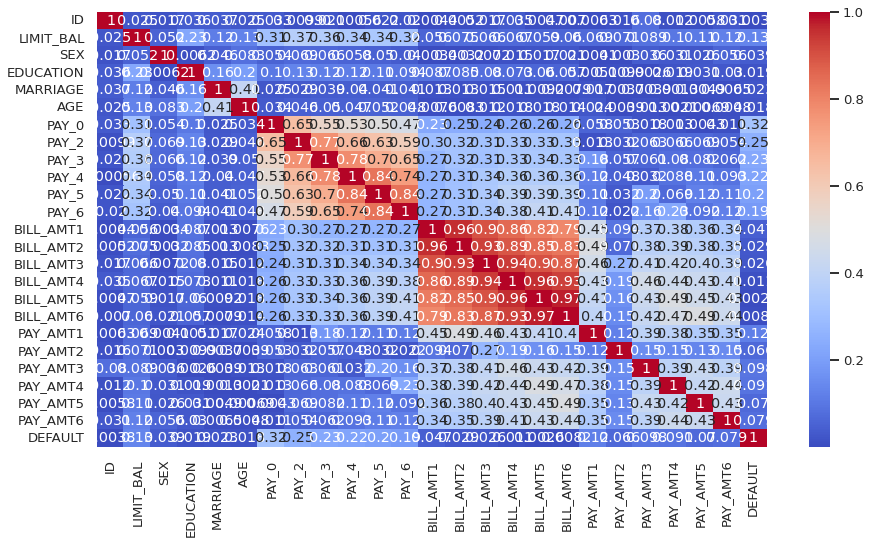

In [ ]:
# Checking for Correlation in dataset
plt.figure(figsize=(15,8))
correlation = data.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

High correlation higher is the error for developing good model so we just remove all collinearity and between the features. By observing above correlation data we are removing more than 80% correlational feature, so we just saving our time from dealing with repeated features.

In [ ]:
data = data.drop(columns=['PAY_4','PAY_6','BILL_AMT6'])
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_5,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-2,3913,3102,689,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,2682,1725,2682,3272,3455,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,29239,14027,13559,14331,14948,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,46990,48233,49291,28314,28959,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,8617,5670,35835,20940,19146,2000,36681,10000,9000,689,679,0


# **Removing Multicollinearity**

In [15]:
# Removing Multicollinearity from dataset
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF 
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [16]:
calc_vif(data[[i for i in data.describe().columns if i not in ['DEFAULT',]]])

,variables,VIF
0,ID,3.903138
1,LIMIT_BAL,3.212211
2,SEX,9.332300
3,EDUCATION,7.361982
4,MARRIAGE,6.447017
5,AGE,11.104799
6,PAY_0,1.841075
7,PAY_2,3.413546
8,PAY_3,3.566799
9,PAY_5,2.449360


In [17]:
calc_vif(data[[i for i in data.describe().columns if i not in ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']]])

,variables,VIF
0,ID,3.861204
1,LIMIT_BAL,3.203435
2,SEX,9.340464
3,EDUCATION,7.317435
4,MARRIAGE,6.470189
5,AGE,11.270681
6,PAY_0,1.875369
7,PAY_2,3.275809
8,PAY_3,3.510919
9,PAY_5,2.335171


In [18]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_5,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-2,3913,3102,689,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,2682,1725,2682,3272,3455,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,29239,14027,13559,14331,14948,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,46990,48233,49291,28314,28959,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,8617,5670,35835,20940,19146,2000,36681,10000,9000,689,679,0
